In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
data = np.loadtxt('train_MNIST.csv', dtype = str, delimiter = ',')


https://github.com/zswarth/MNIST-Classification/blob/master/MNIST.ipynb

In [6]:
y = np.asarray(data[1:, 0:1], dtype='float')
X = np.asarray(data[1:,1:], dtype='float')

def add_ones(x):
    a, b = np.shape(x)
    c = np.ones((a , 1))   
    return np.hstack((c, x))

X = add_ones(X)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

In [11]:
def img(row, data):
    image = np.zeros((28,28))
    for i in range(0,28):
        for j in range(0,28):
            pix = 28*i+j
            image[i,j] = data[row, pix]
    plt.imshow(image, cmap = 'gray')
    plt.show()
    print (data[row,0])

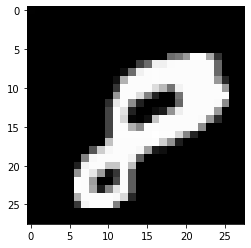

1.0


In [12]:
img(1, X_train)

In [13]:
def create_weights(data):
	a, b = np.shape(data)
	weights = np.random.rand(b,1)
	return weights

weights = create_weights(X_train)

In [14]:
def predict(data_point, weights):
	b = np.dot(data_point, weights)
	a = b>0
	return a*1

In [15]:
def one_number(labels, number):
	return (labels == number)*1

In [16]:
label_ones = one_number(y_train, 2)

In [17]:
def update(weights, data_point, labels, alpha=.1):
	predicted = predict(data_point, weights)
#for i in range(0, len(weights)):
	weight_temp = np.zeros(np.shape(weights))
	weight_temp[:,0] = alpha*(labels-predicted)*data_point
	return weight_temp+weights

In [18]:
np.shape(update(weights, X_train[3], label_ones[3]))

(785, 1)

In [19]:
def train_perceptron(data, labels, weights, alpha = .1, iterations = 100):
	for j in range(0, iterations):
		for i in range(0, len(data)):
			weights = update(weights, data[i], labels[i], alpha)
	return weights

In [20]:
weights_new = train_perceptron(X_train, label_ones, weights, alpha = .1, iterations = 50)

In [49]:
plt.scatter(weights_new[:,0],weights_new[:,1])

IndexError: index 1 is out of bounds for axis 1 with size 1

In [21]:
label_ones = one_number(y_train, 3)
weights_new = train_perceptron(X_train, label_ones, weights, alpha = .01, iterations =6)

In [22]:
def test_perceptron_f(data, labels, weights):
    a,b = np.shape(data)
    predicted = predict(data, weights)
    correct = (predicted==labels)*1==1
    true_pos = np.sum((labels==1)*(correct))
    true_neg = np.sum((labels==0)*(correct))
    total_pos = np.sum(labels)
    total_neg = a-total_pos
    tp_p = true_pos/float(np.sum(labels))
    tn_p = true_neg/float(a- np.sum(labels))
    return true_pos, true_neg, tp_p, tn_p, total_pos, total_neg
    
a,b,c,d,e,f = test_perceptron_f(X_train, label_ones, weights_new)

In [23]:
import matplotlib.pyplot as plt

In [24]:
print c, d

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(c, d)? (<ipython-input-24-d8db5c7f248b>, line 1)

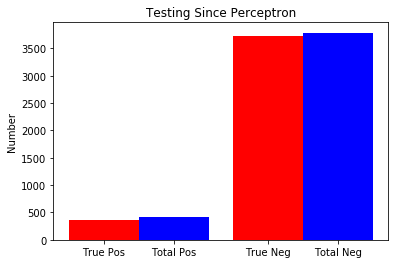

In [25]:

width = 0.3

p1 = plt.bar((1,1.7), (a,b), width, color = 'red')
p1 = plt.bar((1.3,2), (e, f), width, color = 'blue')
plt.ylabel('Number')
plt.title('Testing Since Perceptron')
plt.xticks((1,1.3, 1.7, 2), ('True Pos','Total Pos','True Neg', 'Total Neg'))
# plt.yticks(np.arange(0, 81, 10))
# plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [26]:

for i in range(0,10):
	num = i
	label_ones = one_number(y_train, num)
	weights_new = train_perceptron(X_train, label_ones, weights, alpha = .1, iterations =5)
	label_test = one_number(y_test, num)
	a = test_perceptron_f(X_test, label_test, weights_new)

In [27]:
def all_numbers(data,labels):
	c,d = np.shape(data)
	w = create_weights(data)
	weights = []
	for i in range(0,  len(np.unique(labels))):
		z = one_number(labels, i)
		a = train_perceptron(data, z, w, .1, 4)
		weights.append(a[:,0])
	return np.asarray(weights)

In [28]:
w = all_numbers(X_train, y_train)

In [30]:
print (np.shape(w))

(10, 785)


In [51]:
def one_all(data, weights):
	a = np.dot(data,np.transpose(weights))
	b = len(np.shape(data))
	if b == 1:
		return np.argmax(a)
	return np.argmax(a, axis=1)


def test_all(data, labels, weights):
	a, b = np.shape(labels)
	predicted = one_all(data, weights)
	correct = predicted == labels[:,0]
	accuracy = np.sum(correct)/float(a)
	return accuracy

print (test_all(X_train, y_train, w))



0.9704761904761905


In [57]:
### Figure out what learnign rate to use
### going to rewrite some of my training funtions
a, b = np.shape(y_train)
b


1

In [34]:
import matplotlib.pyplot as plt
lbls = one_number(y_train, 2)
lbls_t = one_number(y_test, 2)

In [36]:
alpha = []
t = .000007
for i in range(0,1):
    alpha.append(t)
    t = t/10.0
True_pos = []
True_neg = []
w = create_weights(X_train)
for a in alpha:
    weights = w
    print (a)
    temp_p = []
    temp_n = []
    for j in range(0,200):
        for k in range(0, len(X_train)):
            weights = update(weights, X_train[k], lbls[k], a)
        f,b,c,d,e,g = test_perceptron_f(X_test, lbls_t, weights)
        temp_p.append(c)
        temp_n.append(d)
    True_pos.append(temp_p)
    True_neg.append(temp_n)
    print (temp_p)
    

7e-06
[0.4355990478709336, 0.6130653266331658, 0.6834170854271356, 0.7085427135678392, 0.7069558317905316, 0.7238825707484793, 0.7334038614123248, 0.7431896323723882, 0.7590584501454641, 0.7746627876223221, 0.7778365511769373, 0.7788944723618091, 0.7818037556202063, 0.7878868024332187, 0.7923829674689236, 0.8016397778365512, 0.8093097064268712, 0.810103147315525, 0.8193599576831526, 0.8214758000528961, 0.8185665167944988, 0.8259719650886009, 0.8212113197566782, 0.8193599576831526, 0.821740280349114, 0.825443004496165, 0.8267654059772547, 0.8201533985718064, 0.8280878074583443, 0.8238561227188574, 0.8225337212377678, 0.8296746892356519, 0.8246495636075113, 0.8299391695318699, 0.8352287754562285, 0.8323194921978313, 0.8370801375297541, 0.8325839724940491, 0.8346998148637926, 0.8309970907167415, 0.8444855858238561, 0.8391959798994975, 0.8426342237503306, 0.8479238296746893, 0.8447500661200741, 0.840782861676805, 0.8460724676011637, 0.8439566252314202, 0.8431631843427665, 0.842369743454112

In [37]:
TP = np.asarray(True_pos)
TN = np.asarray(True_neg)

In [39]:
a,b = np.shape(TP)
print (a, b)

1 200


ValueError: x and y must have same first dimension, but have shapes (2,) and (200,)

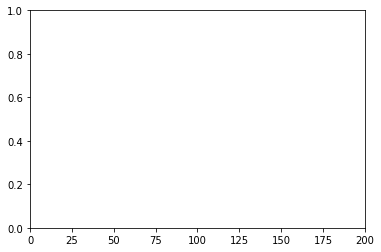

In [43]:
x = plt.xlim(0, b)
a = 6
# plt.plot(x, TP[0,:])
plt.plot(x, TP[0,:])
plt.show()
print (alpha[0])

In [45]:
def all_numbers(data,labels):
	c,d = np.shape(data)
	w = create_weights(data)
	weights = []
	for i in range(0,  len(np.unique(labels))):
		print (i)
		z = one_number(labels, i)
		a = train_perceptron(data, z, w, .000007, 200)
		weights.append(a[:,0])
	return np.asarray(weights)

In [46]:
w = all_numbers(X_train, y_train)

0
1
2
3
4
5
6
7
8
9


In [47]:
print test_all(X_test, y_test, w)

SyntaxError: invalid syntax (<ipython-input-47-e689c2a1800b>, line 1)